In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from data import *

/home/toki/Documents/School/cs234/robotic_priors.git/python/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
filepath = os.path.join("results")

# Find files sorted by time
files = sorted(glob.glob(os.path.join(filepath, "*.hdf5")), key=lambda f: os.stat(f).st_mtime)
print(files)

# Choose and open one file
filename = files[0]
try:
    f.close()
except:
    pass
f = h5py.File(filename, "r")

['results/data-02-27_14-57.hdf5', 'results/data-02-27_15-00.hdf5', 'results/data-02-27_15-04.hdf5']


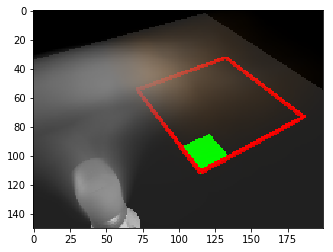

In [20]:
# Plot mean observation
mean_observation = f["mean_observation"][()]
plt.imshow(mean_observation[::-1,:])
plt.show()

In [33]:
o  = []
a  = []
r  = []
x  = []
dx = []
T  = 0
size_batch = 10

episodes = f["episodes"]
for i in episodes:
    if T >= size_batch:
        break
    try:
        grp = episodes[i]
        actions      = grp["actions"][()]
        observations = grp["observations"][()]
        rewards      = grp["rewards"][()]
        xs  = grp["xs"][()]
        dxs = grp["dxs"][()]
    except:
        continue

    # Flatten observations and center
#     observations = observations.reshape(observations.shape[0],-1).astype(np.float64) / 255
#     observations -= mean_observation.reshape(1,-1)
    assert np.all(np.any(np.abs(observations) > 0.01, axis=1))

    # Append data to lists
    o.append(observations)
    a.append(actions)
    r.append(rewards)
    x.append(xs[...,:2] - np.array([0, -0.45])[np.newaxis,:])
    dx.append(dxs[...,:2])
    T += rewards.shape[0]

    print("Episode {}: {}".format(i, T))

# Gather batch
o  = np.concatenate(o, axis=0) # [T x 150 x 200 x 3]
a  = np.concatenate(a, axis=0) # [T x 2]
r  = np.concatenate(r, axis=0) # [T]
x  = np.concatenate(x, axis=0) # 
dx = np.concatenate(dx, axis=0)

Episode 00000: 1000


In [36]:
r.shape

(1000,)